## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


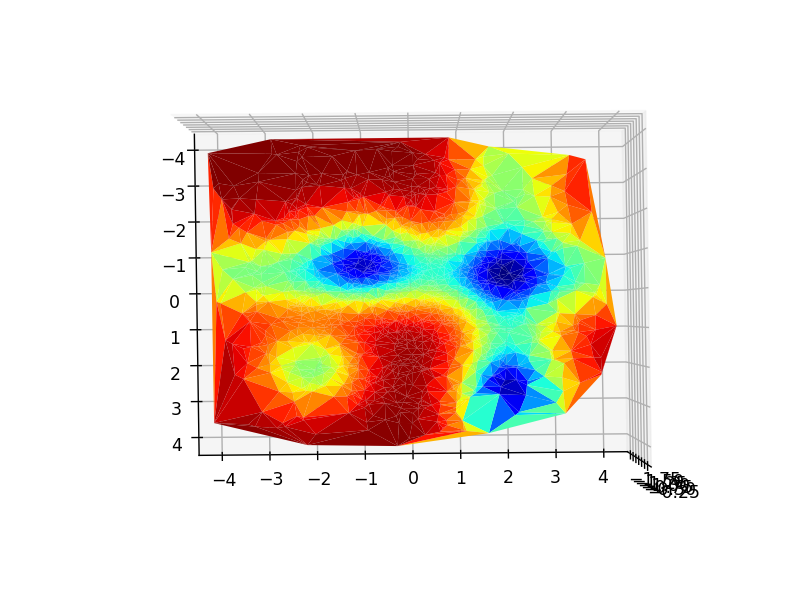

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import LabelEncoder
%matplotlib notebook
df = pd.read_csv('P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [123]:
### Code Starts Here
def my_Gradient(x,y,learning_rate,iteration):
    #Let m be the number of observations or the length of X or Y
#     if type(y) == float:
#         m= 1
#     else:
#         m = len(y)
    #init cost list
    #cost_list = []
    #init theta list 
    #theta_list = [theta]
    pred_list = [0]
    x_list = []
    y_list = []
    if x>0:
        tempx = np.random.uniform(0,x)
        x_list.append(tempx)
    if x<0:
        tempx = np.random.uniform(x,0)
        x_list.append(tempx)
    if y>0:
        tempy = np.random.uniform(0,y)
        y_list.append(tempy)
    if y<0:
        tempy= np.random.uniform(y,0)
        y_list.append(tempy)
    
    
    #tempy = np.random.uniform(y)
    
    #y_list.append(tempy)
    x1 = np.random.uniform(x)
    x_list.append(x1)
    y1= np.random.uniform(y)
    y_list.append(y1)
    print('xlist: ', x_list)
    print('ylist: ', y_list)
    for i in range(1,iteration):
        #pred = x.dot(theta)
        z1 = -(((x+2)**2)+(y+1)**2)
        z2 = -((x-2.75)**2)+(y-2)**2
        z3 = -(x+0.5)**2
        z4 = -(y-2)**2
        z5 = -(((x-2)**2)+(y+2)**2)
        pred = np.log(np.exp(z1) + np.exp(z2) +np.exp(z3) +np.exp(z4) + np.exp(z5))
        pred_list.append(pred)
        #we don't need theta because we have the function
       # theta = theta -(1/m)*learning_rate*(x.T.dot((pred-y)))
       # theta_list.append(theta)
        #print('pred', pred_list[i])
        #print('pred1', pred_list[i-1])
        print('x', x_list[i])
        print('test', x_list[i-1])
        gradx = (pred_list[i] - pred_list[i-1])/(x_list[i]-x_list[i-1])
        grady = (pred_list[i] -pred_list[i-1])/(y_list[i]-y_list[i-1])
        print('pred: ', pred)
        print("gradx: " , gradx)
        print('Grady: ', grady)
        
        #x = x - learning_rate*pred
        x = x -learning_rate*gradx
        x_list.append(x)
        y = y - learning_rate*grady
        y_list.append(y)
        
        if gradx == 0 or grady ==0:
            return x, y
        
        #theta_list[i,:] = theta.T
        #cost = cost_function(x,y,theta)
        #cost_list.append(cost)
        #cost_list[i] = cost_function(x,y,theta)
        
    return x, y
        
#     grad = (1/m)*np.sum(theta - y).dot(x)
#     grad = (1/m)*
#     return grad
    
    

In [63]:
#def cost function
def cost_function(x, y, theta):
    #set m
    m = len(y)
    pred = x.dot(theta)
    cost = (1/2*m)*np.sum(np.square(pred-y))
    return cost

In [137]:
#Test gradient descent
#LR = 0.05, 0.01, .1, 1
#theta = random value of gaussian distirbution
theta = np.random.randn(1499)
learning_rate = 0.05
iterations = 100
x, y = my_Gradient(-1, 0,learning_rate,iterations)

xlist:  [-0.5972932311351027, -0.4477839575646523]
ylist:  [0.81527718148856]
x -0.4477839575646523
test -0.5972932311351027


IndexError: list index out of range

In [18]:
dfq1 = pd.DataFrame(columns =['x', 'y','z'])

In [19]:
dfq1.head()

,x,y,z


In [21]:
#make dfs for each quadrant 
dfq1['x']= df[df['x'] >= 0].loc[:,'x']
dfq1['y'] = df[df['y'] >=0].loc[:, 'y']
dfq1['z'] = df['z'][:767]

In [22]:
dfq1.reset_index(inplace=True)

In [61]:
np.random.randint(4.0)

1

In [135]:
#Run gradient descent on quadrant 1
xq1,yq1 = my_Gradient(4,-4,learning_rate, iterations)

xlist:  [1.8744610156447528, 1.040911610930273]
ylist:  [-3.472972274591775, -2.6619747427667644]
x 1.040911610930273
test 1.8744610156447528
pred:  34.4375
gradx:  -41.31428779772936
Grady:  42.46313786245973
x 6.065714389886468
test 1.040911610930273
pred:  54.99171599499131
gradx:  4.090551788633792
Grady:  -5.9384958959400285
x 5.861186800454778
test 6.065714389886468
pred:  51.57042554954392
gradx:  16.72776985713249
Grady:  -11.522414110907865
x 5.024798307598154
test 5.861186800454778
pred:  47.38940786747552
gradx:  4.998894314995222
Grady:  -7.257190449543692
x 4.774853591848393
test 5.024798307598154
pred:  43.33420625657646
gradx:  16.224394257484676
Grady:  -11.17567918078832
x 3.963633878974159
test 4.774853591848393
pred:  38.57659891170417
gradx:  5.864758054282983
Grady:  -8.514216036285134
x 3.67039597626001
test 3.963633878974159
pred:  33.99541274004378
gradx:  15.622762709928955
Grady:  -10.76126363751328
x 2.889257840763562
test 3.67039597626001
pred:  28.760548190

In [136]:
#min coordinated of quadrant 1

xq1,yq1

(-0.2616288332687005, -0.4608858867006573)

In [126]:
np.random.uniform(0,4)

2.626205618434369

In [127]:
#run gradient descent for Q2
xq2,yq2 = my_Gradient(-4,-4,learning_rate,iterations)

xlist:  [-2.9690950455416916, -3.2915157303176765]
ylist:  [-2.0450077120989456, 0.8530933026425398]
x -3.2915157303176765
test -2.9690950455416916
pred:  -9.467011834803973
gradx:  29.36229678124271
Grady:  -3.266625899735397
x -5.468114839062135
test -3.2915157303176765
pred:  -20.064581786023638
gradx:  4.868866254995725
Grady:  2.259724466597609
x -5.711558151811921
test -5.468114839062135
pred:  -22.46692700246157
gradx:  9.868191445895624
Grady:  21.26228442403918
x -6.2049677241067025
test -5.711558151811921
pred:  -30.767058594266192
gradx:  16.821991420234987
Grady:  7.807375187231032
x -7.046067295118452
test -6.2049677241067025
pred:  -40.96705093503135
gradx:  12.12697365722788
Grady:  26.129120469187257
x -7.652415977979846
test -7.046067295118452
pred:  -32.35323170540683
gradx:  -14.206049214084914
Grady:  -6.593271472556729
x -6.9421135172756
test -7.652415977979846
pred:  -23.71383159560959
gradx:  12.162987723893709
Grady:  26.20671739593047
x -7.550262903470285
test 

In [128]:
#Minimum coordinates for quadrant 2
xq2,yq2

(8.02270134381128, -0.897859753180623)

In [133]:
#run gradient on quadrant 3
xq3, yq3 = my_Gradient(-4,4, learning_rate, iterations)

xlist:  [-2.446732044073343, -1.0618302617358775]
ylist:  [1.0461921608277231, 1.9703812114455417]
x -1.0618302617358775
test -2.446732044073343
pred:  -3.9997387755508877
gradx:  -2.88810284350999
Grady:  -4.32783614226664
x -3.8555948578245003
test -1.0618302617358775
pred:  -4.910643271695426
gradx:  0.3260491229002755
Grady:  -0.40556553824881
x -3.871897313969514
test -3.8555948578245003
pred:  -5.000977231544658
gradx:  5.541125769374419
Grady:  -4.454715765017106
x -4.148953602438235
test -3.871897313969514
pred:  -6.047978715986587
gradx:  3.7790208272429577
Grady:  -4.700643271851534
x -4.337904643800383
test -4.148953602438235
pred:  -7.2594262872780755
gradx:  6.4114363305868265
Grady:  -5.154390585415831
x -4.658476460329724
test -4.337904643800383
pred:  -8.715046048187906
gradx:  4.540697858810683
Grady:  -5.648077058919271
x -4.8855113532702585
test -4.658476460329724
pred:  -10.462232305890158
gradx:  7.695672832809351
Grady:  -6.186835765433302
x -5.270294994910726
tes

In [134]:
xq3,yq3

(-14.690981631013731, 23.462112163054)

In [124]:
#Test gradient descent in each of the four quadrents of the chart
#quadrent 4

xq4, yq4 = my_Gradient(4,4, learning_rate, iterations)

xlist:  [2.2288942437730945, 2.971758271584198]
ylist:  [1.749638679270006, 1.3802831726591602]
x 2.971758271584198
test 2.2288942437730945
pred:  2.4390991235506245
gradx:  3.2833722353437764
Grady:  -6.603662541629486
x 3.835831388232811
test 2.971758271584198
pred:  4.250786091896313
gradx:  2.096682483737584
Grady:  0.6141520039110872
x 3.7309972640459317
test 3.835831388232811
pred:  4.325298930680379
gradx:  -0.7107689348483291
Grady:  -2.426527579802656
x 3.766535710788348
test 3.7309972640459317
pred:  4.8269598509606935
gradx:  14.116005798350395
Grady:  4.134805014836179
x 3.060735420870828
test 3.766535710788348
pred:  4.805573355236652
gradx:  0.03030105828738083
Grady:  0.10344621159790494
x 3.059220367956459
test 3.060735420870828
pred:  4.783638533128332
gradx:  14.477924764397907
Grady:  4.240816897883361
x 2.3353241297365637
test 3.059220367956459
pred:  3.8158634414439705
gradx:  1.3368975283863604
Grady:  4.564097507569307
x 2.2684792533172455
test 2.3353241297365637

In [125]:
# Minimum x,y for quadrant 1 is 
xq4,yq4

(1.2592801861268021, 2.8009269503278897)

In [138]:
df.head()

,Unnamed: 0,x,y,z,z_pred
0,0,3.325447,-0.869890,-0.048580,-0.063702
1,1,0.199415,-1.064081,-0.865777,-0.883839
2,2,0.623499,1.176377,-0.796616,-0.760264
3,3,0.294015,-0.907471,-0.734876,-0.747532
4,4,-0.613311,-2.226039,-1.179802,-1.155625


Answer the result here:

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

In [139]:
winedf = pd.read_csv('winequality-red.csv')

In [140]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,NaN,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
#Find total number of missing values
winedf.isna().sum()

fixed acidity            19
volatile acidity         32
citric acid             170
residual sugar           38
chlorides                51
free sulfur dioxide      80
total sulfur dioxide     57
density                  58
pH                       34
sulphates                61
alcohol                  22
quality                   0
dtype: int64

In [142]:
#Fill Nans with mean
meanWineDf = winedf.fillna(np.mean(winedf))

In [143]:
meanWineDf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.292169,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.292169,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.292169,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
meanWineDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [145]:
medianWineDf = winedf.fillna(np.median(meanWineDf))

In [146]:
medianWineDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [147]:
zeroWineDf = winedf.fillna(0)

In [148]:
zeroWineDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<IPython.core.display.Javascript object>


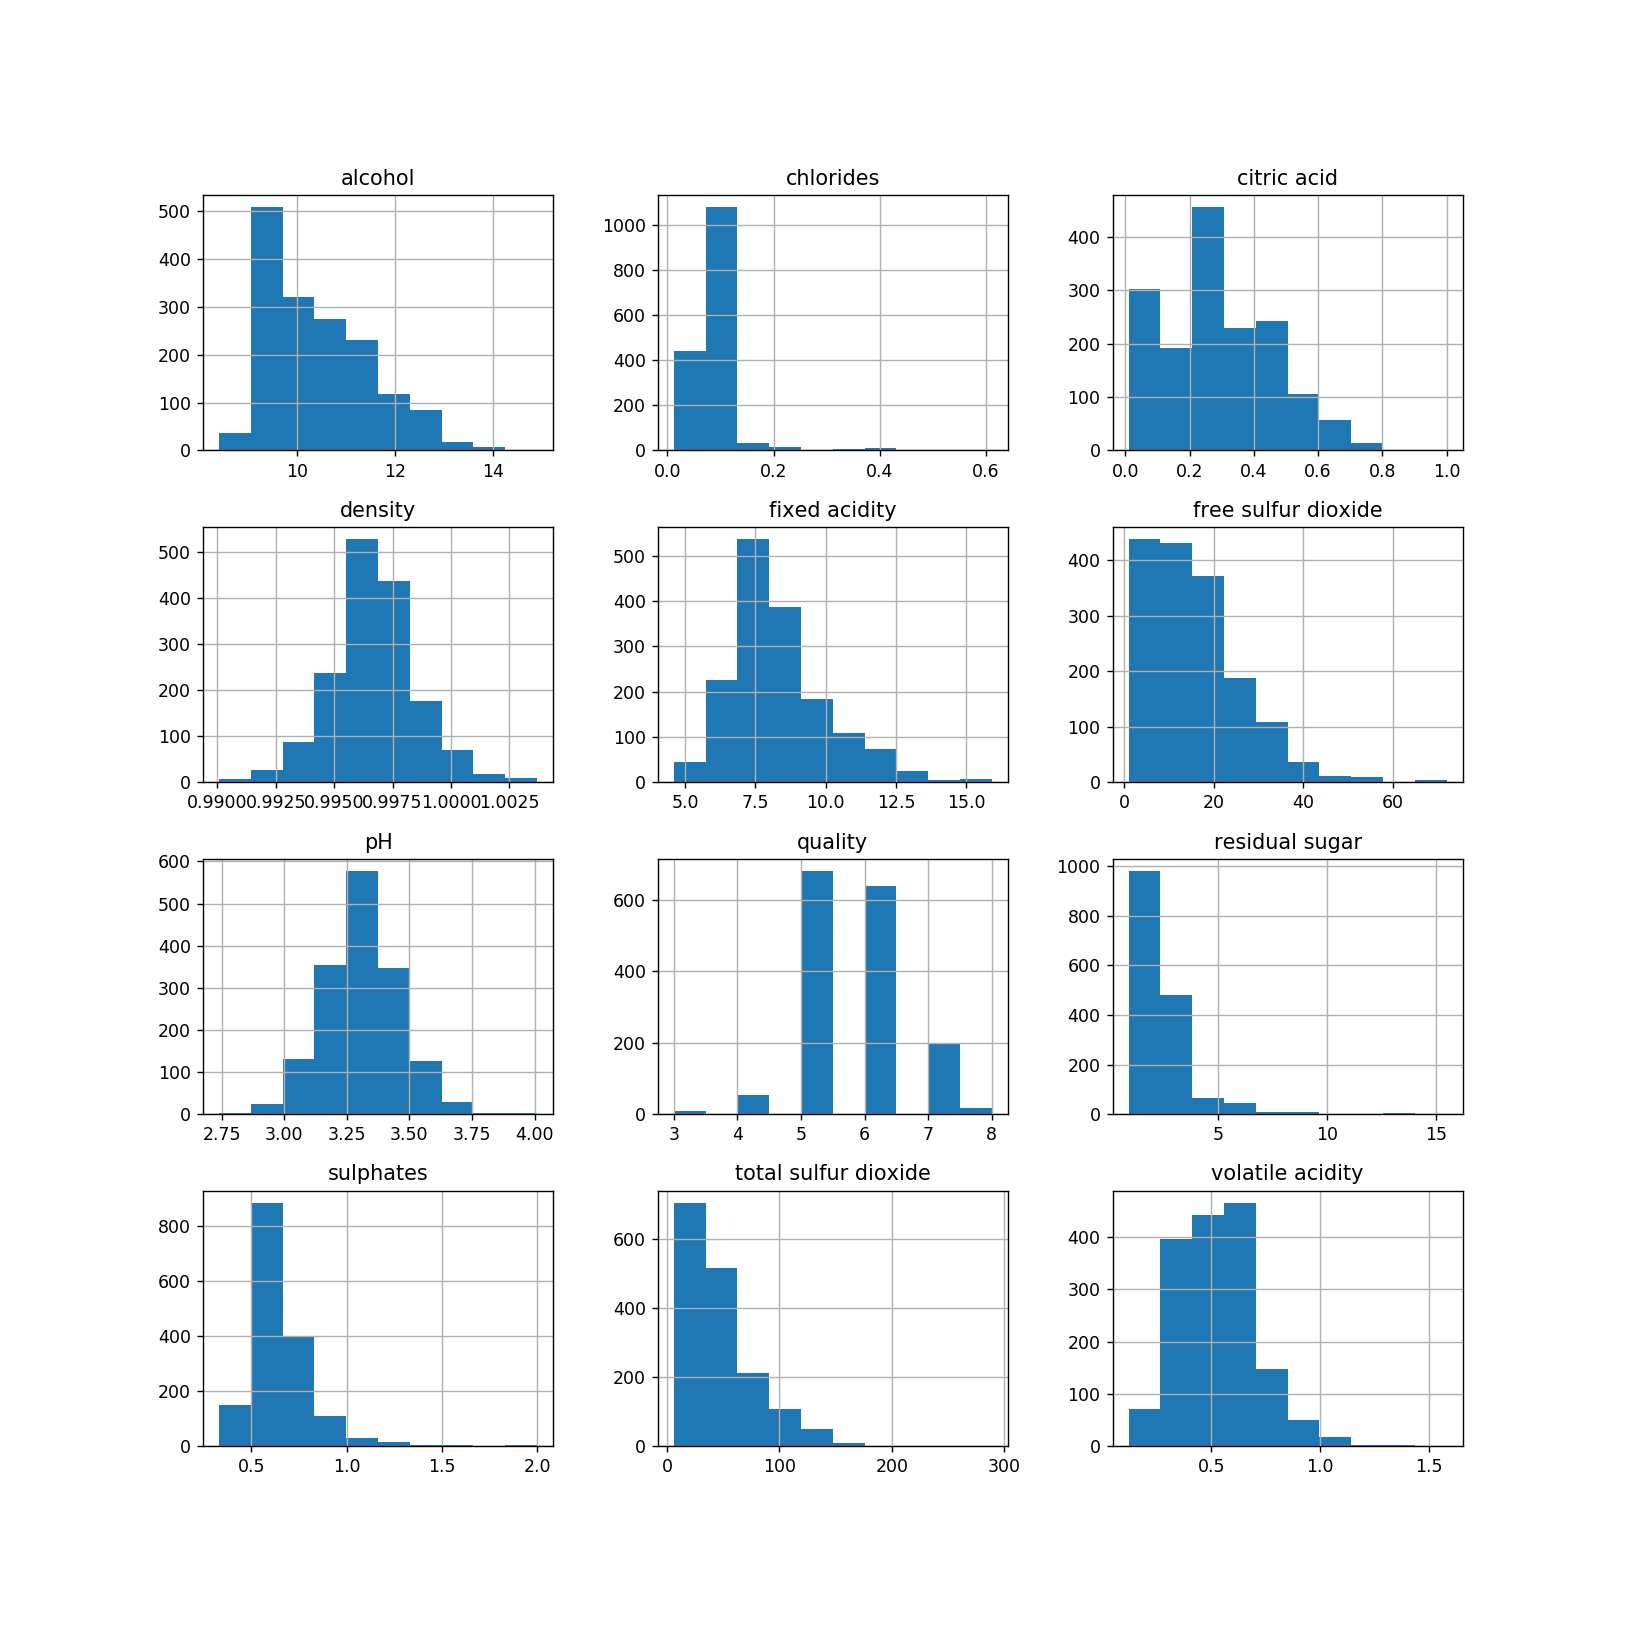

In [149]:
#Plot Historgrams of each of the dfs
#plot meanwinedf 
meanWineDf.hist(figsize=[13,13])
plt.show()

<IPython.core.display.Javascript object>


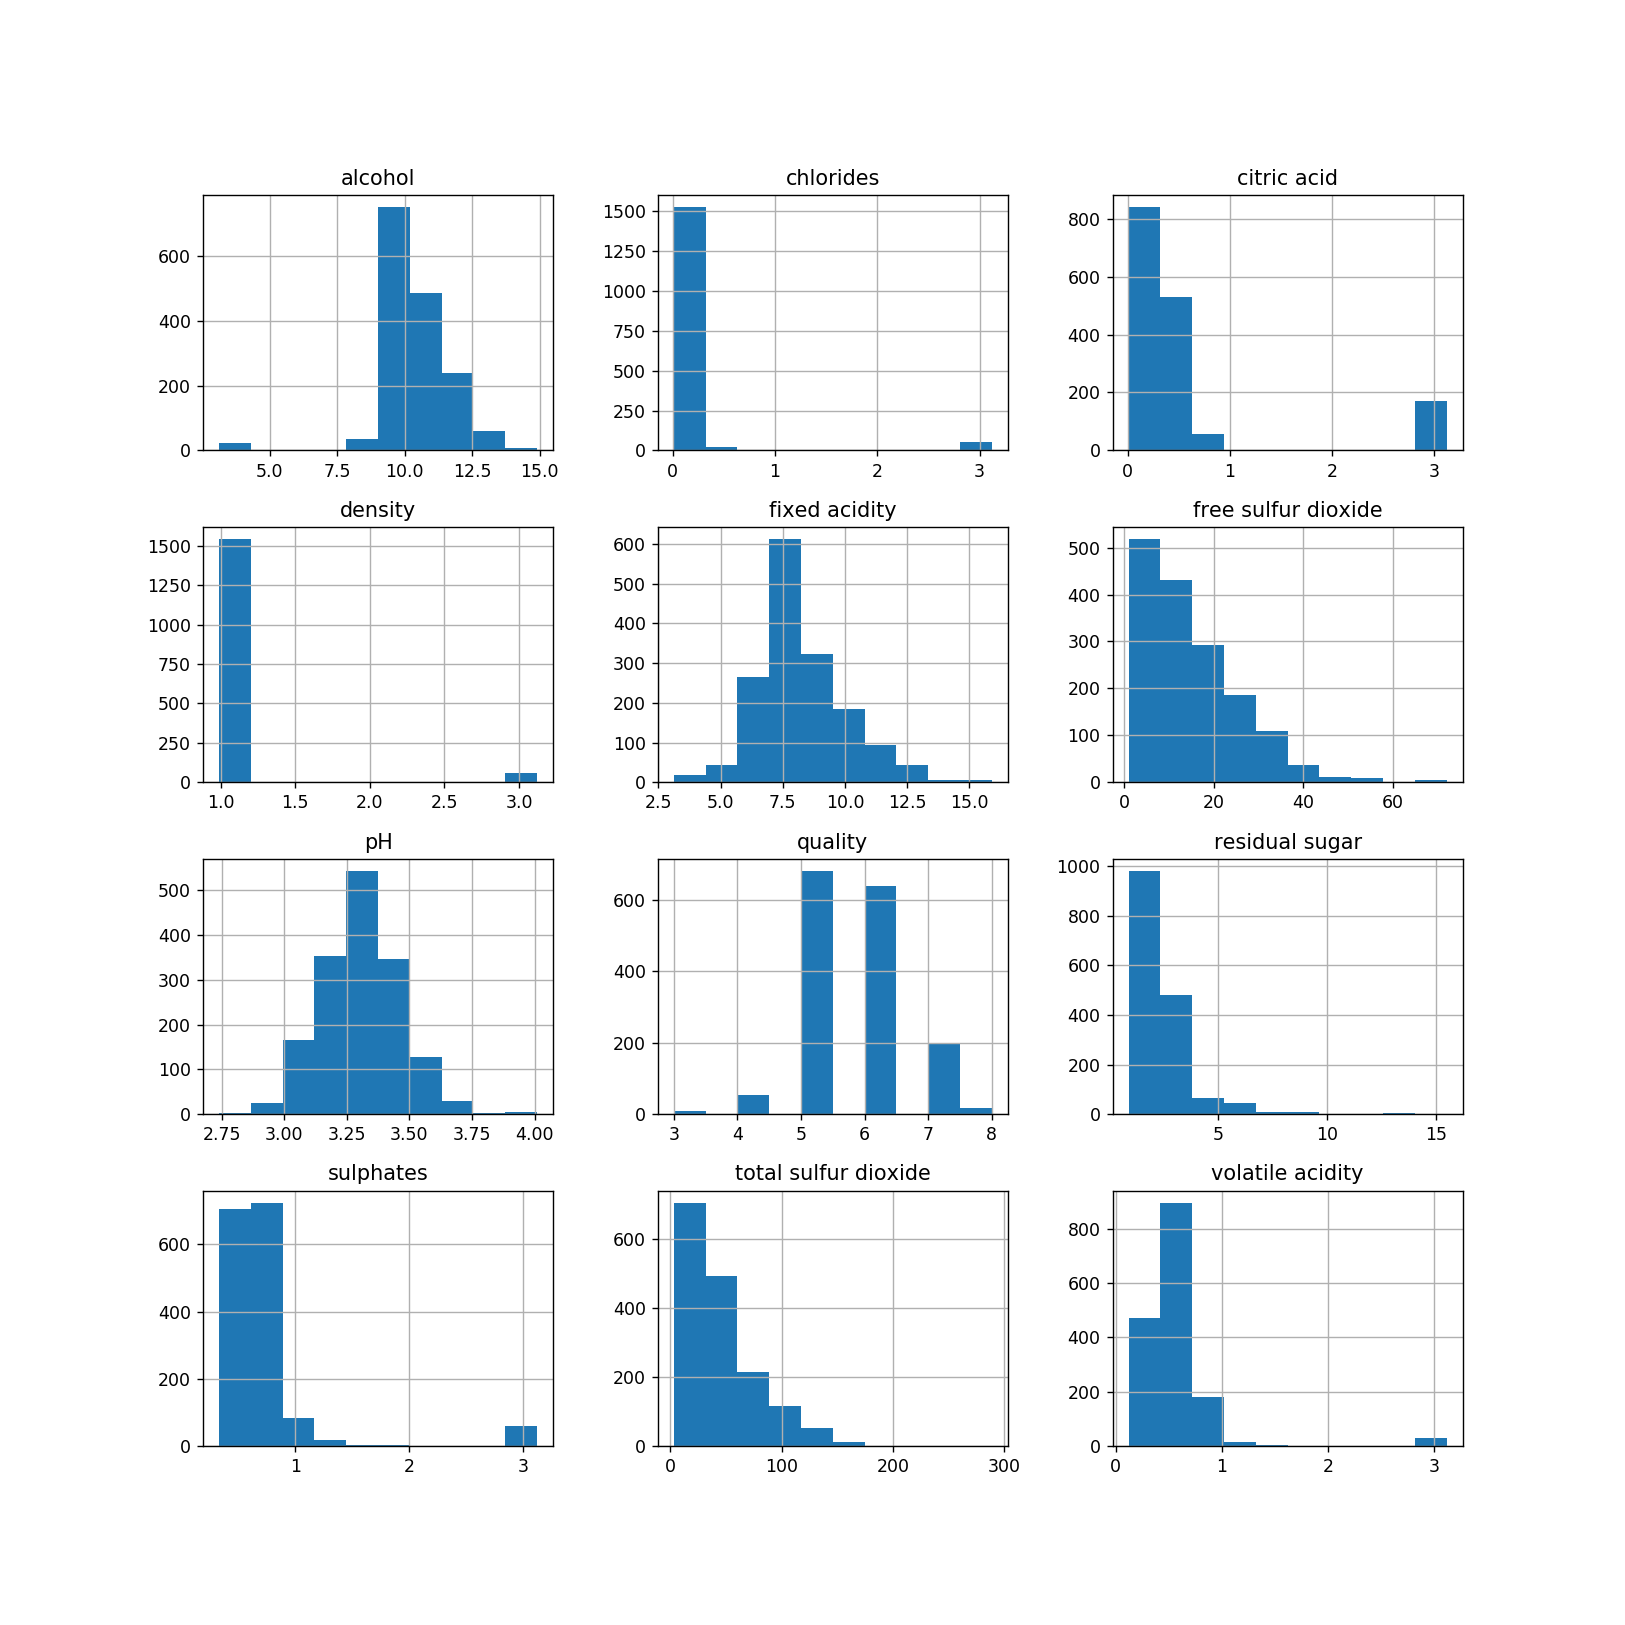

In [150]:
#plot medaianwinedf histograms

medianWineDf.hist(figsize=[13,13])
plt.show()

<IPython.core.display.Javascript object>


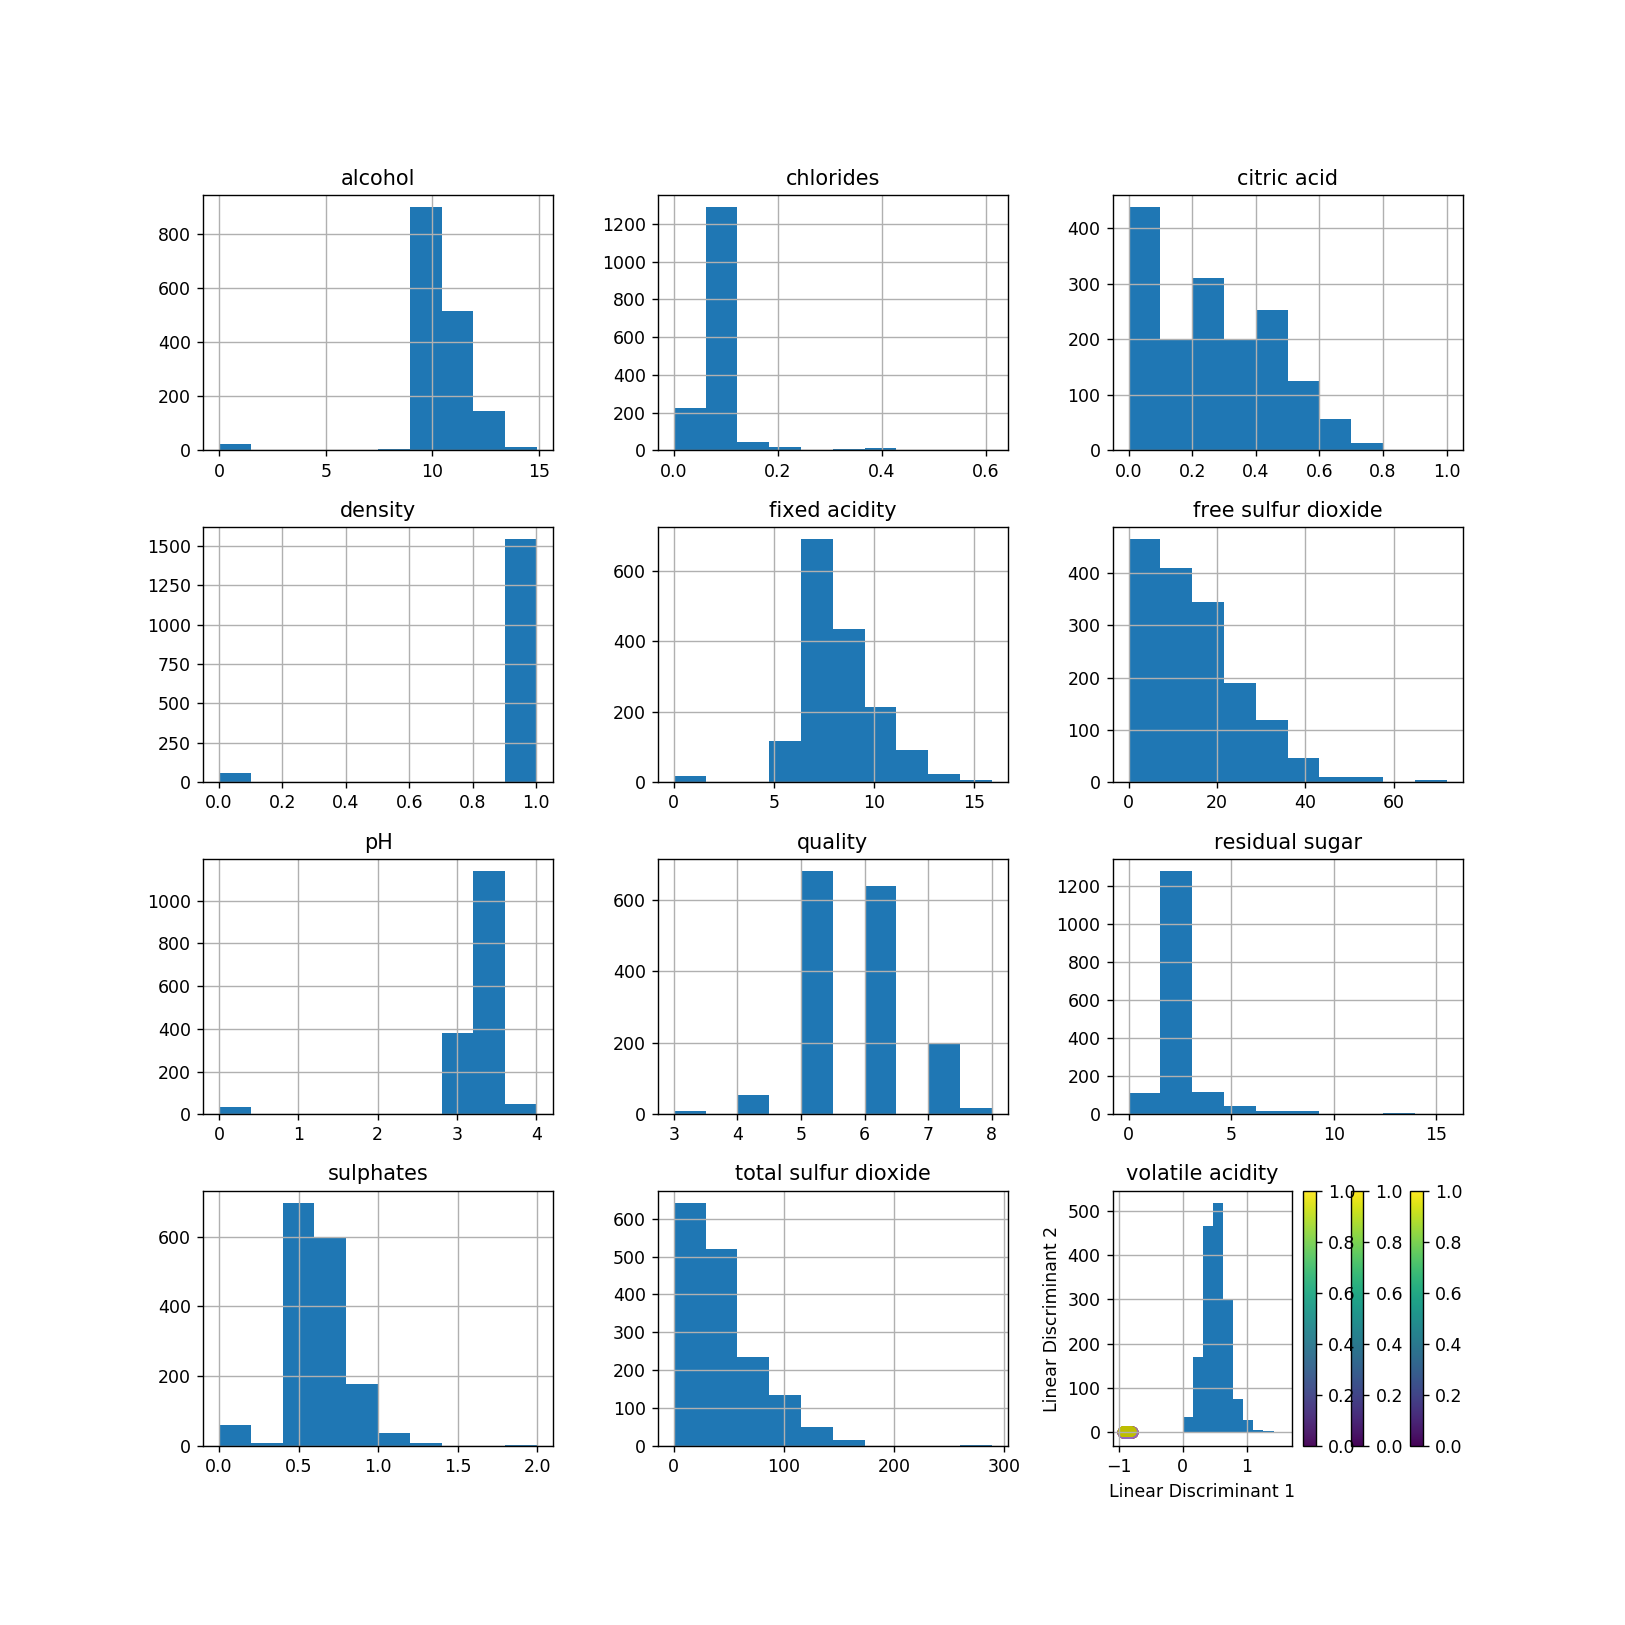

In [151]:
#plot zerowinedf
zeroWineDf.hist(figsize=[13,13])
plt.show()

In [152]:
#########
'''
When comparing methods for filling missing values, using the average seems to be 
the most appropriate method. This can be determined from looking at the distributions
of the features for each condition. The mean meathod produces the most gausian-like distributions
including the density,fixed acidity, volital acitdity, and pH features. The other two methods
produce histograms that are silimar to each other with 


'''


'\nWhen comparing methods for filling missing values, using the average seems to be \nthe most appropriate method. This can be determined from looking at the distributions\nof the features for each condition. The mean meathod produces the most gausian-like distributions\nincluding the density,fixed acidity, volital acitdity, and pH features. The other two methods\nproduce histograms that are silimar to each other with \n\n\n'

In [153]:
##change quality from integers into good and bad
#median is 6 and mena is 5.6
#anything above the mean is "good" anything below the mean is"bad"

quality_mean = np.mean(meanWineDf['quality'])

In [154]:
meanWineDf['quality'] = np.greater(meanWineDf['quality'],quality_mean)

In [155]:
#change true and false to 1 and 0

meanWineDf['quality'] = meanWineDf['quality'].astype('int64')

In [156]:
# Change true and fals to good and bad 
#meanWineDf['quality'] = np.where(meanWineDf['quality'], 'Good', 'Bad')

In [157]:
meanWineDf['quality'].unique()

array([0, 1], dtype=int64)

In [158]:
######### Train Test Split ############

In [159]:
#Split Data set into X and Y
meanwineX = meanWineDf.iloc[:,:11]
meanwineY = meanWineDf.iloc[:,11:12]

In [305]:
#create array version of x and y data
meanwineX_arr = np.array(meanwineX)
meanwineY_arr =np.array(meanwineY)

In [160]:
#Train Test Split
meanX_train, meanX_test, meanY_train, meanY_test = train_test_split(meanwineX, meanwineY, stratify=meanwineY, test_size=0.3, random_state=0)

In [161]:
#Create array version of x and y test and train
meanX_test_arr = np.array(meanX_test)
meanX_train_arr = np.array(meanX_train)
meanY_train_arr = np.array(meanY_train)
meanY_test_arr = np.array(meanY_test)

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

In [162]:
######## version X #########3
#taken from eCornell

In [163]:
def innerproduct(X,Z=None):
    # function innerproduct(X,Z)
    #
    # Computes the inner-product matrix.
    # Syntax:
    # D=innerproduct(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix G of size nxm
    # G[i,j] is the inner-product between vectors X[i,:] and Z[j,:]
    #
    # call with only one input:
    # innerproduct(X)=innerproduct(X,X)
    #
    if Z is None: # case when there is only one input (X)
        Z=X;

    # YOUR CODE HERE
    #X = np.array([n,d])
   # Z = np.array([m,])
    #n,d = X.shape #dimensions of X
    #m = Z.shape[0] #dimension of Z
    
    G= np.zeros((X.shape[0],Z.shape[0])) #reserve memory for matrix D
    G = np.dot(X, Z.T)
    return G
    raise NotImplementedError()

In [164]:
 def l2distance(X,Z=None):
    # function D=l2distance(X,Z)
    #
    # Computes the Euclidean distance matrix.
    # Syntax:
    # D=l2distance(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix D of size nxm
    # D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    #
    # call with only one input:
    # l2distance(X)=l2distance(X,X)
    #
    if Z is None:
        Z=X

    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"

    # YOUR CODE HERE
    #first reserve the memory for the D matrix
    D = np.zeros((X.shape[0],Z.shape[0]))
    #estabilish the innerproduct or dot productD
    
    #note X[0] is an array
    #this is soooo close
    #D = np.sqrt(np.sum( (X[0]-Z[0])**2) - np.sum( (X[0].T-Z[0].T**2)))
    G = np.dot(X,Z.T)
    #D = np.sum(np.square(X)) + np.sum(np.square(Z)) - 2*G
    
    #S = np.dot(X[:,...],X[:,...].T) #for S we want to square the value of each training row
    S = np.square(X[:,...])
    S = np.sum(S,1)
    S = np.expand_dims(S,1)
    #R = np.dot(Z[:,...],Z[:,...].T) #for R we want to square the value for each testing column
    R = Z[...,:]
    R = np.square(R)
    R = np.sum(R,1)
    
    #S and R should both be 1 D Vectors
    
    R = np.expand_dims(R,0)
    D1 =  R -2*G
    Dfinal = D1 + S
    Dfinal = np.sqrt(Dfinal)

    return Dfinal



    raise NotImplementedError()
    
#X = np.random.rand(700,100)
#Z = None#np.random.rand(800,100)
#l2distance(X,Z)

In [165]:
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """

    # YOUR CODE HERE
    #FIRST reserve space in memory for distance and index matricies
    indices = np.zeros((xTr.shape[0], xTe.shape[0]))
    dists = np.zeros((xTr.shape[0], xTe.shape[0]))
    #define the gram Marix (dot product), G
    G = np.dot(xTr, xTe.T)
    
    
    #define L2distance/Euclidean distance

    
    #G = np.dot(X,Z.T)
    S = np.square(xTr[:,...])
    S = np.sum(S,1)
    S = np.expand_dims(S,1)
    R = xTe[...,:]
    R = np.square(R)
    R = np.sum(R,1)
    
    #S and R should both be 1 D Vectors
    
    R = np.expand_dims(R,0)
    D1 =  R -2*G
    Dfinal = D1 + S
    Dfinal = np.sqrt(Dfinal)
    
    
    dists = l2distance(xTr, xTe)
    dists_sorted = np.sort(Dfinal,0)
    dists_sorted_k = dists_sorted[:k,...]
    #print('l2sortedk', dists_sorted_k.shape)
    
    
    #Define index matrix

    indices = np.argsort(dists_sorted_k)
    
    

    #print("index1", index1)
    #print("index2", index2)
    #print('indices', indices)
    #print('dists', dists_sorted_k.shape)
    #print('Dfinal', Dfinal)
    
    return indices, dists_sorted_k
    return None
    raise NotImplementedError()
    


In [166]:
def accuracy(truth,preds):
    """
    function output=accuracy(truth,preds)         
    Analyzes the accuracy of a prediction against the ground truth
    
    Input:
    truth = n-dimensional vector of true class labels
    preds = n-dimensional vector of predictions
    
    Output:
    accuracy = scalar (percent of predictions that are correct)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()

    # YOUR CODE HERE
    correct = 0
   # print('truth: ', truth.shape)
   # print('preds: ', preds.shape)
    sub = truth - preds
    subzeros = np.count_nonzero(sub)
    truthlen = len(truth)
    correct = truthlen - subzeros
    ans = (float(correct)/truthlen)
    ans = np.float64(ans)
    #print('subzeros', subzeros)
    #print('truthlen', truthlen)
    #print('correct',correct)
    #print('ans', ans.dtype)
    
    return ans
    raise NotImplementedError()
    
#truth = np.array([1, 2, 3, 4])
#preds = np.array([1, 2, 3, 0])
#accuracy(truth,preds)

In [167]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()

    # YOUR CODE HERE
    I,D = findknn(xTr,xTe,k)
    
#     print('I: ', I.shape)
#     print('D: ', D.shape)
#     print('ytr: ', yTr.shape)
    
    labels =np.multiply(I.flatten()[:yTr.shape[0]],yTr)
    labels = np.array(labels)
#     print('labels', labels.dtype)
#     print('yTr', yTr.dtype)
#     print('[I]', I.flatten().dtype)
#     print('D', D)
#     print('mindist', np.amin(D))
    
    #print('dist', D)
    
    return labels
    
    raise NotImplementedError()
    
   

In [168]:
indices, dist= findknn(meanX_train_arr, meanX_test_arr, 3)

<ipython-input-165-7c4bbea8d442>:41: RuntimeWarning: invalid value encountered in sqrt
  Dfinal = np.sqrt(Dfinal)
<ipython-input-164-d63c90c0bc5a>:50: RuntimeWarning: invalid value encountered in sqrt
  Dfinal = np.sqrt(Dfinal)


In [169]:
indices.shape, dist.shape, meanX_train_arr.shape

((3, 480), (3, 480), (1119, 11))

In [170]:
pred = knnclassifier(meanX_train_arr, meanY_train_arr, meanX_test_arr, 3)

<ipython-input-165-7c4bbea8d442>:41: RuntimeWarning: invalid value encountered in sqrt
  Dfinal = np.sqrt(Dfinal)
<ipython-input-164-d63c90c0bc5a>:50: RuntimeWarning: invalid value encountered in sqrt
  Dfinal = np.sqrt(Dfinal)


In [171]:
pred.shape

(1119,)

In [172]:
knn_result=accuracy(meanY_train_arr,pred)

In [173]:
#Accuracy of my_knn
knn_result

0.4673815907059875

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

In [63]:
#LDA requires the following steps
#1 find the between class scatter
#find within class scatter
#find inverse of bc ans wc scatter and find eigen values and eigen vectors
#choose fires k eigen vectors that will be the linear discrimintates
#trandorm original n dim data points into k dimensions

In [335]:
#Implement LDA

class my_LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_disc = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        labels = np.unique(y)
#         temp = pd.concat([X, y],sort=False, axis=1)
#         quality_feature_means = pd.DataFrame(columns = y.quality.unique())
#         print('temp: ', temp.shape)
#         for i , row in temp.groupby('quality'):
#             quality_feature_means[i] = row.mean()
#         print('feature_means: ', quality_feature_means)                                 
        #find S_W and S_B
        mean = np.mean(X,0)
        #print('mean: ', mean)
        s_w = np.zeros((n_features, n_features))
        s_b = np.zeros((n_features, n_features))
        for l in labels:
            #print('l: ', l)
            #X_l should be all rows of each feature with y==0 or y==1 with shape (n #y==0,n_features)
            #X_l = quality_feature_means[l][:11]
            X_l = X[y==l]
            #print('X_l: ', X_l.shape)
            mean_l = np.mean(X_l,0)
            #print('mean_l: ', mean_l)
            #within class scatter
            s_w += (X_l -mean_l).T.dot(X_l - mean_l)
            #print('s_w: ', s_w)
            #number of samples in label class
            n_l = X_l.shape[0]
            #print('n_l', n_l)
            mean_diff = (mean_l- mean).reshape(n_features,1)#should be n_features,1
            #print('mean_diff: ', mean_diff)
            s_b += n_l * (mean_diff).dot(mean_diff.T)
        A= np.linalg.inv(s_w).dot(s_b)
        #get egien vectors and values
        eigenvalues, eigenvectors = np.linalg.eig(A)
        #transpose eigenvectors
        eigenvectors = eigenvectors.T
        index = np.argsort(abs(eigenvalues))[::-1] #order in decreasing order
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        self.linear_disc = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        #do dot product projections of X on linear disc
        return np.dot(X, self.linear_disc.T)

In [336]:
#call lda class with n = 2
lda = my_LDA(2)

In [315]:
meanwineY_arr.shape

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [333]:
#change shape of mean y
meanwineY_arr = meanwineY_arr.reshape((1599,))

In [337]:
#LDA Fit on to wine x and wineY
lda.fit(meanwineX_arr, meanwineY_arr)

In [324]:
#transform the data
meanwineX_projected = lda.transform(meanwineX_arr)

In [325]:
meanwineX_projected.shape

(1599, 2)

In [328]:
#ld 2 and ld 2
meanwineX1lda = meanwineX_projected[:,0]
meanwineX2lda = meanwineX_projected[:,1]

In [341]:
#plot lda
plt.scatter(meanwineX1lda, meanwineX2lda, c='y', edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()

In [62]:
#####Version 1 of LDA #######

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

In [97]:
###Version 2 of logisitic regression

class my_LogisticRegression:
    def __init__(self, lr=0.001, iterations=1000):
        self.lr = lr
        self.iterations = iterations
        self.weights = None
        self.bias = None 
        
    def temp(self):
        pass
    
    def sigmoid(self,z):
        sgmd = 1/(1+np.exp(-z))
        return sgmd
        
    def fit(self, x, y):
        rows, features = x.shape
        self.weights = np.zeros((features,1))
        self.bias = 0
        
        #do gradient descent
        for i in range(self.iterations):
            linear = np.dot(x,self.weights) + self.bias
            y_pred = self.sigmoid(linear)
            
            #derivatives
            dw = (1/rows) + np.dot(x.T,(y_pred-y))
            db = (1/rows)+np.sum(y_pred -y)
            
            #update weight and bias
            #print('dw: ', dw.shape)
            #print('weight: ', self.weights.shape)
            self.weights = self.weights -self.lr*dw
            self.bias =self.bias -self.lr*db
            
            
    def predict(self, x):
        linear = np.dot(x,self.weights) + self.bias
        y_pred = self.sigmoid(linear)
        y_pred_class = [1 if i>0.5 else 0 for i in y_pred]
        return y_pred_class
    
    def accuracy(self,y_true, y_pred):
        acc = np.sum(y_true==y_pred)/len(y_true)
        return acc
        

In [98]:
logreg = my_LogisticRegression()

In [99]:
logreg.fit(meanX_train_arr,meanY_train_arr)

<ipython-input-97-1a8853bbcf8d>:14: RuntimeWarning: overflow encountered in exp
  sgmd = 1/(1+np.exp(-z))


In [100]:
log_pred = logreg.predict(meanX_test_arr)

In [101]:
#report accuracy
log_acc = logreg.accuracy(meanY_test_arr,log_pred)

In [102]:
#Logistic regression accuracy
log_acc

254.2375

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)

In [123]:
#all_acc = pd.DataFrame(data=[grad_acc, knn_result, lda_acc,log_acc], columns = ['Gradient Descent Acc', 'Knn Acc','LDA Acc','Logistic Regression Acc'])
all_acc = pd.DataFrame(data=[knn_result,log_acc], columns = ['Accuracy'], index =['Knn','LogReg'])

In [122]:
log_acc

254.2375

In [121]:
knn_result

0.4673815907059875

In [124]:
all_acc

,Accuracy
Knn,0.467382
LogReg,254.237500
